Starting KNN classification script...
Generating dataset...
Dataset saved as knn_dataset.csv
Scaling dataset...
Scaler saved as scaler.pkl
Finding optimal k...
Optimal k found: 19
Optimal k: 19


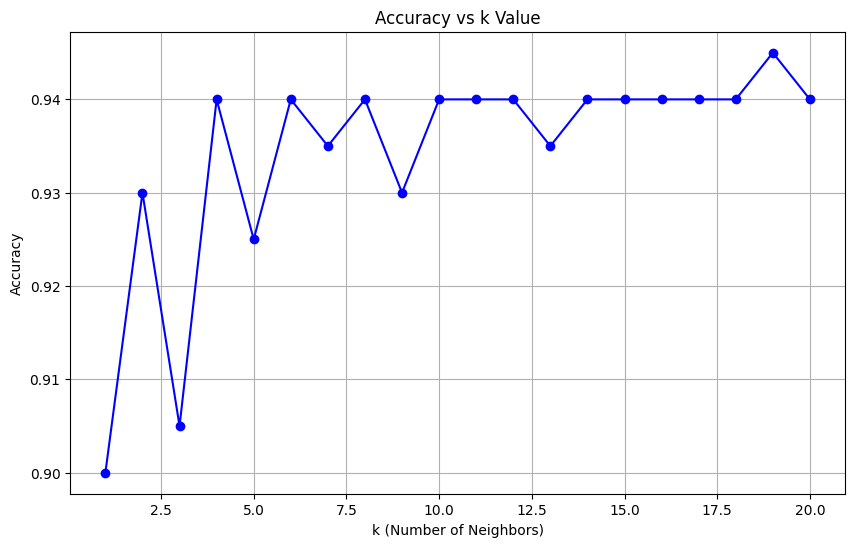

Training KNN model with k=19...
Model saved as knn_model.pkl

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       104
           1       0.97      0.92      0.94        96

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200

Accuracy: 0.9450


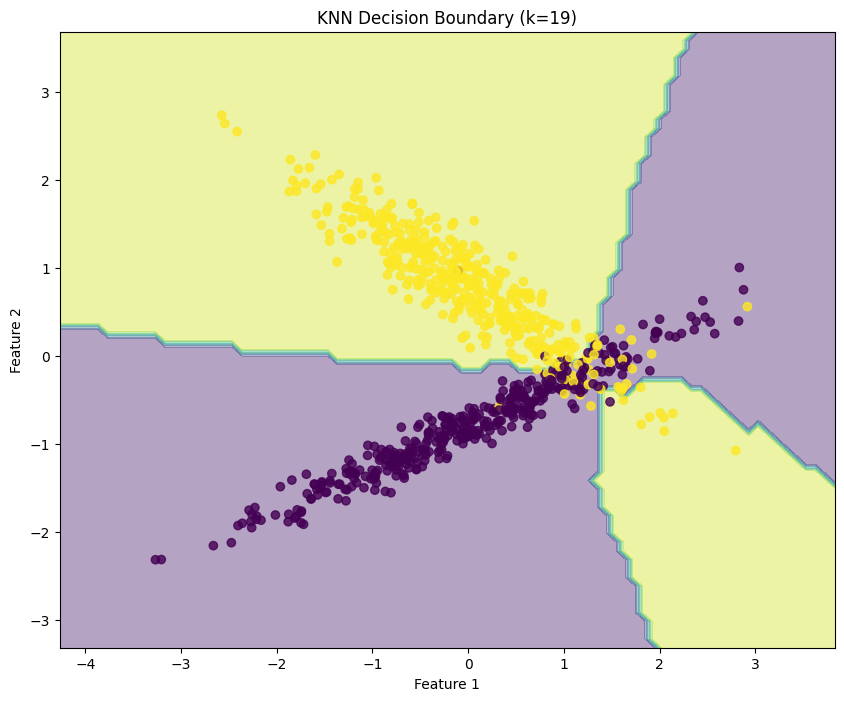

Script execution completed.


In [1]:
#!/usr/bin/env python
# coding: utf-8

import numpy as np
import matplotlib.pyplot as plt
import logging
import os
import joblib
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification

# Setup logging
log_file = "knn_logs.txt"
logging.basicConfig(filename=log_file, level=logging.INFO,
                    format="%(asctime)s - %(levelname)s - %(message)s",
                    filemode="w")

def log_message(message):
    """Log and print messages"""
    print(message)
    logging.info(message)

def generate_data():
    """Generate and save classification dataset"""
    log_message("Generating dataset...")

    X, y = make_classification(
        n_samples=1000,
        n_features=2,
        n_redundant=0,
        n_informative=2,
        n_clusters_per_class=1,
        random_state=42
    )

    # Save dataset
    dataset_filename = "knn_dataset.csv"
    df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
    df['Label'] = y
    df.to_csv(dataset_filename, index=False)
    
    log_message(f"Dataset saved as {dataset_filename}")

    return train_test_split(X, y, test_size=0.2, random_state=42)

def preprocess_data(X_train, X_test):
    """Scale the features and save the scaler"""
    log_message("Scaling dataset...")

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Save scaler
    joblib.dump(scaler, "scaler.pkl")
    log_message("Scaler saved as scaler.pkl")

    return X_train_scaled, X_test_scaled, scaler

def find_optimal_k(X_train, X_test, y_train, y_test, max_k=20):
    """Find the optimal value of k using validation accuracy"""
    log_message("Finding optimal k...")
    
    k_values = range(1, max_k + 1)
    accuracies = []
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    optimal_k = k_values[np.argmax(accuracies)]
    log_message(f"Optimal k found: {optimal_k}")
    
    return optimal_k, accuracies

def plot_k_accuracies(k_values, accuracies):
    """Plot accuracies for different k values"""
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracies, 'bo-')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs k Value')
    plt.grid(True)
    plt.show()

def plot_decision_boundary(model, X, y, title="KNN Decision Boundary"):
    """Plot the decision boundary and data points"""
    plt.figure(figsize=(10, 8))
    
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Make predictions on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and points
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

def train_knn(X_train, y_train, optimal_k):
    """Train KNN model and save it"""
    log_message(f"Training KNN model with k={optimal_k}...")

    knn = KNeighborsClassifier(n_neighbors=optimal_k)
    knn.fit(X_train, y_train)

    # Save model
    model_filename = "knn_model.pkl"
    joblib.dump(knn, model_filename)
    log_message(f"Model saved as {model_filename}")

    return knn

def main():
    log_message("Starting KNN classification script...")

    # Generate and split data
    X_train, X_test, y_train, y_test = generate_data()
    
    # Preprocess data
    X_train_scaled, X_test_scaled, scaler = preprocess_data(X_train, X_test)
    
    # Find optimal k
    max_k = 20
    optimal_k, accuracies = find_optimal_k(
        X_train_scaled, X_test_scaled, 
        y_train, y_test, 
        max_k
    )
    log_message(f"Optimal k: {optimal_k}")
    
    # Plot accuracy vs k
    plot_k_accuracies(range(1, max_k + 1), accuracies)
    
    # Train model with optimal k
    knn = train_knn(X_train_scaled, y_train, optimal_k)
    
    # Make predictions
    y_pred = knn.predict(X_test_scaled)
    
    # Print results
    log_message("\nClassification Report:")
    log_message(classification_report(y_test, y_pred))
    log_message(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    
    # Plot decision boundary
    plot_decision_boundary(knn, X_train_scaled, y_train,
                           f"KNN Decision Boundary (k={optimal_k})")

    log_message("Script execution completed.")

if __name__ == "__main__":
    main()